# Number of measurements

In [ ]:
# Old (Only two-body operator)
# Scenario I
# With Z
# 3.346867e+05 + 5.178210e+03 + 1.602815e+01 # Linear H4
# 6.252647e+05 + 5.484471e+03 + 3.980259e+02 + 7.746857e+02 + 2.036258e+02 # Linear H6
# 7.789555e+05 + 6.242684e+03 + 5.194209e+02 + 5.190350e+02 + 1.393310e+02 + 1.486339e+02 # Linear H8
# Without Z
# 1.054351e+04 + 1.476513e+03 + 1.602815e+01 # Linear H4
# 1.497657e+04 + 1.833753e+02 + 1.993699e+01 # Square H4
# 1.396422e+04 + 1.449076e+03 + 2.578151e+02 + 2.160114e+02 + 7.575041e+01 # Linear H6
# 2.240904e+04 + 6.607444e+02 + 7.168817e+01 + 1.781053e+01 + 4.606682e+00 # Circular H6
# 1.479907e+04 + 1.441129e+03 + 1.144888e+02 + 1.071069e+02 + 4.727250e+01 + 7.630754e+01 # Linear H8

# Scenario II
# With Z
# 3.346867e+05 + 5.178210e+03 + 1.602815e+01 # Linear H4
# 4.378790e+05 + 1.833753e+02 + 1.993699e+01 # Square H4
# 6.252647e+05 + 5.484471e+03 + 3.980259e+02 + 7.746857e+02 + 2.036258e+02 # Linear H6
# 7.789555e+05 + 6.242684e+03 + 5.194209e+02 + 5.190350e+02 + 1.393310e+02 + 1.486339e+02 # Linear H8
# Without Z
# 9.977143e+03 + 1.689800e+03 + 1.668489e+01 # Linear H4
# 1.497657e+04 + 1.821768e+02 + 2.325548e+01 # Square H4
# 1.082148e+04 + 1.449076e+03 + 2.578151e+02 + 2.160114e+02 + 7.575041e+01 # Linear H6
# 2.240904e+04 + 8.253099e+02 + 7.304075e+01 + 1.768215e+01 + 4.652039e+00 # Circular H6
# 1.140331e+04 + 1.441129e+03 + 1.144888e+02 + 1.071069e+02 + 4.727250e+01 + 7.456090e+01 # Linear H8

In [ ]:
# Scenario I

# With one-body operator
# 1.658004e+04 + 6.134740e+03 + 1.058959e+02 # Linear H4
# 2.015815e+04 + 1.939889e+02 + 4.056274e+03 # Square H4
# 1.925522e+04 + 5.765126e+03 + 2.723434e+02 + 2.281896e+02 + 7.593420e+01 # Linear H6
# 2.506184e+04 + 6.528531e+03 + 7.410691e+01 + 3.314475e+01 + 2.898954e+01 # Circular H6
# 1.989271e+04 + 5.776648e+03 + 1.168248e+02 + 1.127148e+02 + 4.806268e+01 + 7.461722e+01 # Linear H8

31726.612199999996

In [7]:
# Scenario II

# With one-body operator
# 1.563393e+04 + 6.168132e+03 + 1.060202e+02 # Linear H4
# 2.015815e+04 + 1.933539e+02 + 4.057176e+03 # Square H4
# 1.716664e+04 + 5.765126e+03 + 2.723434e+02 + 2.281896e+02 + 7.593420e+01 # Linear H6
2.506184e+04 + 6.562561e+03 + 7.480277e+01 + 3.311131e+01 + 2.898896e+01 # Circular H6
# 1.781919e+04 + 5.776648e+03 + 1.168248e+02 + 1.064416e+03 + 4.806268e+01 + 7.461722e+01 # Linear H8

31761.304039999995

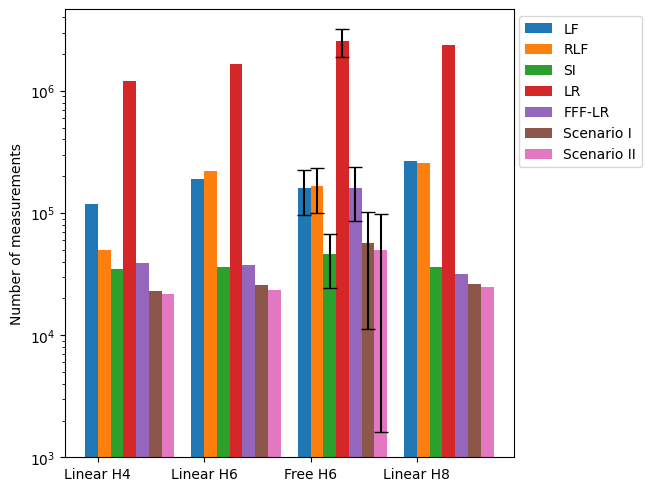

In [3]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Linear H4", "Linear H6", "Free H6", "Linear H8")
penguin_means = {
    'LF': (118949, 191024, 160648, 268854),
    'RLF': (49904, 222457, 166019, 258924),
    'SI': (34871, 35815, 46026, 36005),
    'LR': (1199635, 1645934, 2537379, 2379372),
    'FFF-LR': (38912, 37446, 161375, 31798),
    'Scenario I': (22820, 25596, 56964, 26021),
    'Scenario II': (21908, 23508, 49452, 24899)
}

penguin_errors = {
    'LF': (0, 0, 63669, 0),
    'RLF': (0, 0, 66551, 0),
    'SI': (0, 0, 21584, 0),
    'LR': (0, 0, 645405, 0),
    'FFF-LR': (0, 0, 75782, 0),
    'Scenario I': (0, 0, 45720, 0),
    'Scenario II': (0, 0, 47838, 0)
}

x = np.arange(len(species))
width = 0.12
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    
    # Plot bars without any error bars
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    
    # Add error bars only for "Free H6" (index 2)
    if penguin_errors[attribute]:
        # Only for the Free H6 position (index 2)
        ax.errorbar(x[2] + offset, measurement[2], 
                   yerr=penguin_errors[attribute][2], 
                   fmt='none', ecolor='black', capsize=5)
    
    multiplier += 1

ax.set_ylabel('Number of measurements')
ax.set_yscale('log')
ax.set_xticks(x + width, species)
ax.set_ylim(bottom=1e3)

leg = plt.legend(loc='upper right')
plt.draw()
bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
xOffset = 0.3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
plt.savefig('filename.png', dpi=300, bbox_inches="tight")

plt.show()

In [1]:
# # Appendix Table
# # Benchmark
# array1 = 
# # Scenario I
# array2 = [31295.78576152506, 67667.55970373513, 79855.84665901511, 21553.32298599726, 13796.06911261996, 58508.58437865187, 30790.342479414503, 11521.364271286595, 38443.2950449151, 27453.036751024123, 4665.545711052997, 8798.409540271829, 24267.453867632663, 36591.197383884246, 91875.7989941202, 36236.04460232849, 17524.22871976898, 45123.35800461766, 27299.499880659318, 56873.51993122642, 116219.28082547605, 26595.751653543433, 119866.9616076359, 29989.13221200107, 74271.35407200956, 2575.5568374394256, 37314.19020652141, 166636.32833115797, 46763.60229176469, 46403.99630760114, 50570.074839554945, 56324.894560480985, 32702.544437539123, 151743.95364869086, 80223.25168820469, 31275.2273481507, 39406.97074260287, 42532.428388449545, 41982.81713579655, 24144.915048763727, 24834.1233107594, 45472.582227386294, 121645.68626778193, 249459.7491269304, 62867.574112290524, 52739.823959637804, 79975.64724250321, 27888.78284866756, 43281.59191155958, 42342.910318099806, 39017.45218618286, 28436.421849404822, 39421.89874115702, 24851.19708511029, 26967.287868810825, 97888.98635724587, 20489.296589976882, 38451.021401179045, 56113.76115550601, 41044.59748802005, 63848.967226310146, 6505.965817242884, 33269.755062917175, 53231.403152684376, 37306.213234947856, 36749.05238297298, 85820.34222848386, 107386.79589661754, 213569.56480913752, 31247.714600895553, 196353.72371395817, 207794.00107993966, 35273.95034310373, 3816.836800550313, 131044.05659535172, 29147.73961165736, 55175.29650650701, 34566.69096519794, 36246.264457173886, 17709.70952091384, 31335.475665687904, 33933.730363397466, 37090.548599507965, 107782.80119477928, 74197.86010546995, 26532.344792729396, 34081.81839231357, 34537.37212781535, 31547.833869225928, 47351.17160176479, 41234.78367039522, 34940.52677796696, 54203.665980671416, 160775.71348668594, 52328.67511778836, 19739.869349514473, 58706.38772633174, 46051.17426253141, 116336.63069236833, 27183.19378580156]
# # Scenario II
# array3 = [88839.10751509086, 40299.883913191836, 48232.99582889876, 20042.295820397918, 13312.943411520115, 32615.24478263984, 54078.19207221243, 12378.975738000536, 9891.998504844842, 4323.836296771507, 7417.237958750995, 10146.402055787446, 23370.577373223783, 184608.99824702783, 72062.63020692687, 12740.701171437653, 17688.723044533097, 78705.92039196801, 10402.852236502293, 73771.09962993077, 108768.90112029162, 14362.625449097419, 92500.21077414142, 5082.487331884304, 54216.30151532483, 4407.110414627338, 19362.92759717566, 138651.84260818257, 21000.03169228661, 51254.89046353616, 114427.42171801659, 24993.164467628136, 8813.694667594302, 138975.0973490582, 88981.22249094966, 33294.07753334272, 13792.859029740499, 14718.635540087489, 100163.74520673459, 27664.50515490348, 24195.344115023723, 80098.93648844882, 133697.9074250578, 225960.7348776425, 46306.55355929633, 33685.96789628886, 52735.151735300904, 26801.41917520515, 17643.068027331472, 20847.08865799647, 103961.67977416494, 37444.14728268101, 12560.329049548182, 21823.594688704172, 20235.87668896087, 73089.00458790737, 20488.523002289603, 10817.288512818202, 35242.945635475444, 16555.048269574872, 35290.678864106056, 8031.190885929108, 8327.829458197983, 24414.97451165017, 13968.434093673046, 22745.83235931287, 87732.57154446997, 79777.90905828335, 186524.24511330228, 30160.95718491138, 157896.9149223666, 178342.00227467355, 9744.607539066512, 7340.844178341906, 109638.85355571359, 53293.08114721263, 26791.79429340802, 14014.495780227706, 15791.678490623697, 7347.006349818028, 7180.292442062145, 51391.517407586536, 14829.174843086143, 38317.04818036043, 49475.29418910176, 4101.2103641087815, 13757.244875231536, 11124.304081839531, 85279.10172010832, 21395.523404428437, 16280.84540153735, 9340.890873035898, 42498.37604796737, 185373.8809237153, 29663.59701053403, 17642.204704990087, 34165.792717287215, 20475.887563530097, 91489.05051378728, 6056.552067304046]

# # LaTeX table code
# latex_table = """
# \\begin{tabular}{|c|c|c|}
# \\hline
# SI & Scenario I & Scenario II \\\\
# \\hline
# """
# # Add all 100 rows
# for i in range(100):
#     latex_table += f"{array1[i]} & {array2[i]} & {array3[i]} \\\\ \n"
# latex_table += """
# \\hline
# \\end{tabular}
# """

# print(latex_table)

# Sample error

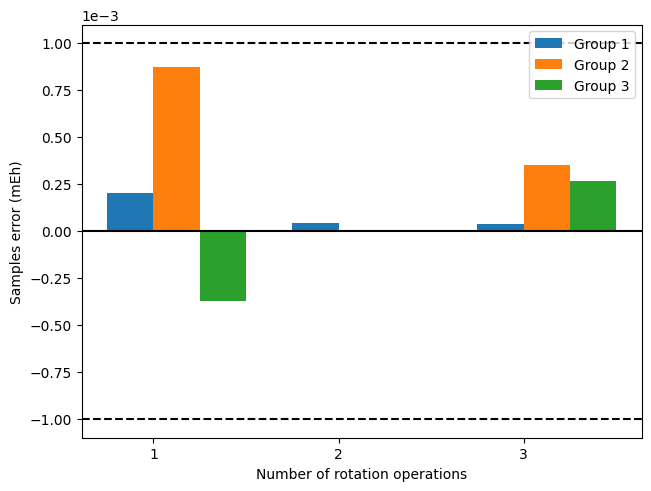

In [10]:
# Linear H4 Scenario I
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3")
penguin_means = {
    'Group 1': (2.047516e-04, 4.233578e-05, 3.684585e-05),
    'Group 2': (8.750914e-04, 3.721086e-06, 3.537534e-04),
    'Group 3': (-3.740940e-04, 8.333020e-06, 2.675241e-04)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

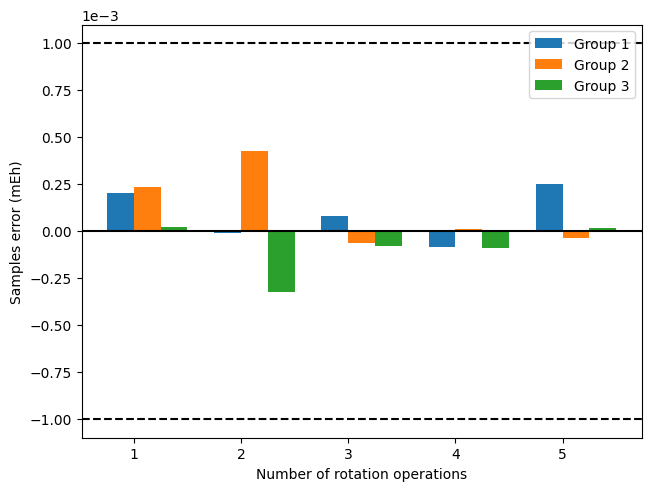

In [11]:
# Linear H6 Scenario I
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3", "4", "5")
penguin_means = {
    'Group 1': (2.047053e-04, -1.234153e-05, 8.155432e-05, -8.517910e-05, 2.496591e-04),
    'Group 2': (2.354422e-04, 4.285301e-04, -6.424563e-05, 1.299576e-05, -3.714929e-05),
    'Group 3': (1.985827e-05, -3.261344e-04, -7.744346e-05, -9.220573e-05, 1.901760e-05)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

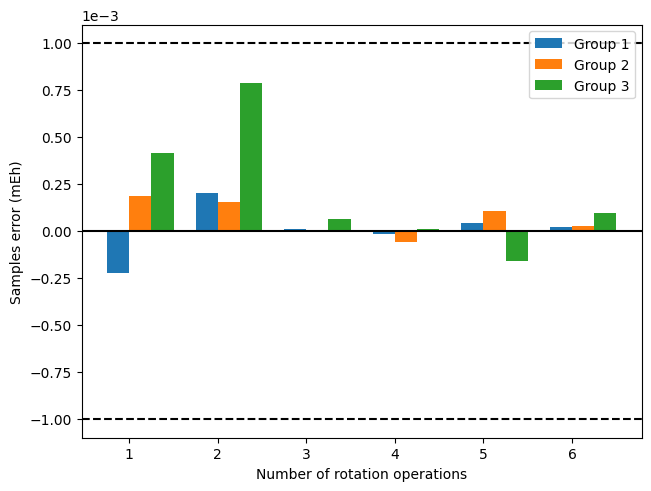

In [12]:
# Linear H8 Scenario I
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3", "4", "5", "6")
penguin_means = {
    'Group 1': (-2.216987e-04, 2.026209e-04, 1.136429e-05, -1.717672e-05, 4.149614e-05, 2.140595e-05),
    'Group 2': (1.882092e-04, 1.549661e-04, 7.833906e-06, -5.753160e-05, 1.079719e-04, 2.871750e-05),
    'Group 3': (4.165257e-04, 7.867794e-04, 6.197577e-05, 9.721489e-06, -1.579183e-04, 9.548323e-05)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

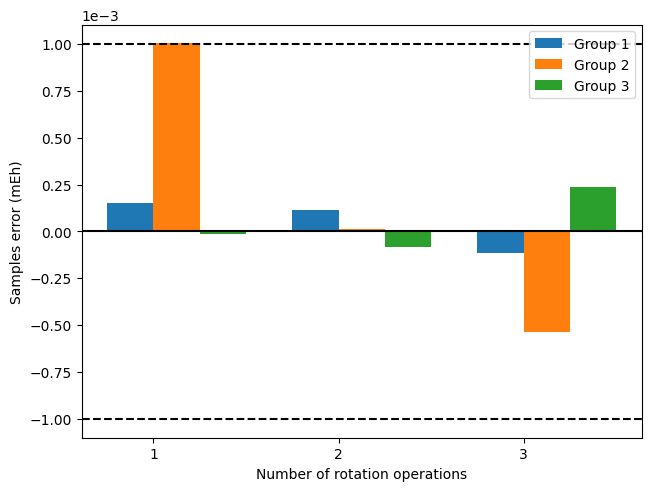

In [13]:
# Linear H4 Scenario II
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3")
penguin_means = {
    'Group 1': (1.538007e-04, 1.166999e-04, -1.146592e-04),
    'Group 2': (1.003408e-03, 1.350426e-05, -5.357186e-04),
    'Group 3': (-1.124498e-05, -8.163539e-05, 2.349065e-04)
}
# 'Value': [6.129789e-05, -8.724818e-04, 7.715878e-04, -6.788524e-05, -5.431277e-05, -4.738371e-05, 2.963136e-05, 8.467038e-06, -1.749603e-04]

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

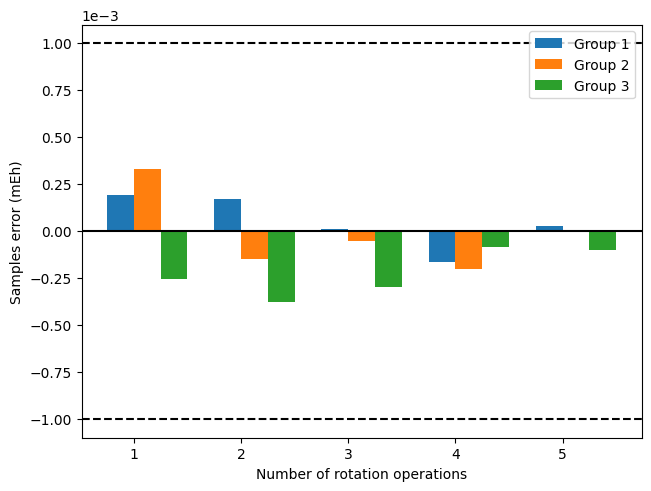

In [14]:
# Linear H6 Scenario II
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3", "4", "5")
penguin_means = {
    'Group 1': (1.899641e-04, 1.734014e-04, 9.997841e-06, -1.645317e-04, 2.652892e-05),
    'Group 2': (3.327621e-04, -1.470226e-04, -5.024928e-05, -2.031127e-04, 2.671391e-06),
    'Group 3': (-2.557184e-04, -3.786313e-04, -2.955295e-04, -8.682383e-05, -1.021638e-04)
}
# 'Value': [6.129789e-05, -8.724818e-04, 7.715878e-04, -6.788524e-05, -5.431277e-05, -4.738371e-05, 2.963136e-05, 8.467038e-06, -1.749603e-04]

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

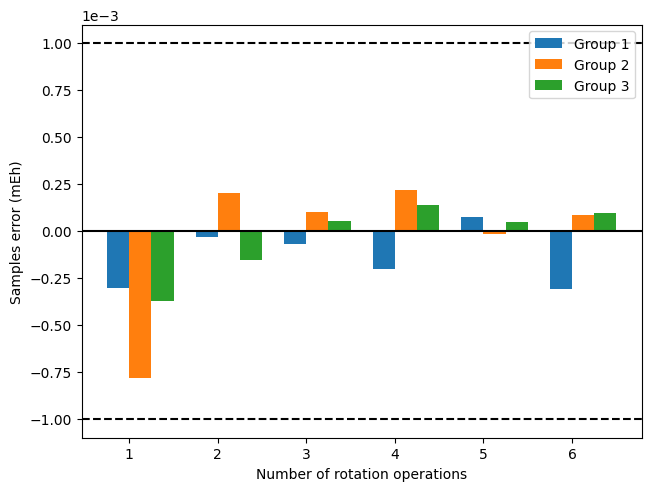

In [15]:
# Linear H8 Scenario II
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "3", "4", "5", "6")
penguin_means = {
    'Group 1': (-3.018176e-04, -3.382985e-05, -6.747131e-05, -2.036775e-04, 7.283796e-05, -3.080925e-04),
    'Group 2': (-7.797693e-04, 2.029847e-04, 9.952185e-05, 2.170683e-04, -1.397828e-05, 8.768293e-05),
    'Group 3': (-3.736195e-04, -1.530100e-04, 5.171541e-05, 1.393864e-04, 4.912043e-05, 9.866712e-05)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Samples error (mEh)')
plt.xlabel('Number of rotation operations')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')
plt.savefig('filename.png', dpi=300)

plt.show()

## Other test plots

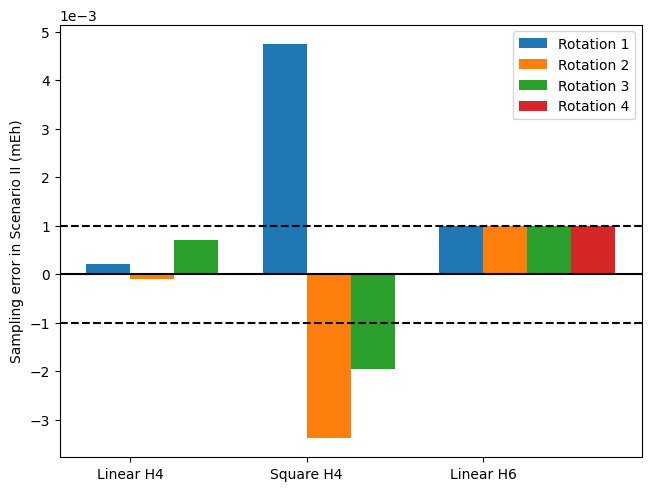

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Linear H4", "Linear H6")
penguin_means = {
    'Rotation 1': (2.084931e-04, 0.001),
    'Rotation 2': (-9.384863e-05, 0.001),
    'Rotation 3': (7.117607e-04, 0.001),
    'Rotation 4': (0, 0.001),
    'Rotation 5': (0, 0),
    'Rotation 6': (0, 0)
}
# 'Value': [2.084931e-04, -9.384863e-05, 7.117607e-04, 4.743110e-03, -3.373012e-03, -1.965862e-03]

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Overhead in circuit depth')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 240)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Sampling error in Scenario II (mEh)')

plt.axhline(y=1e-3, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')

plt.show()

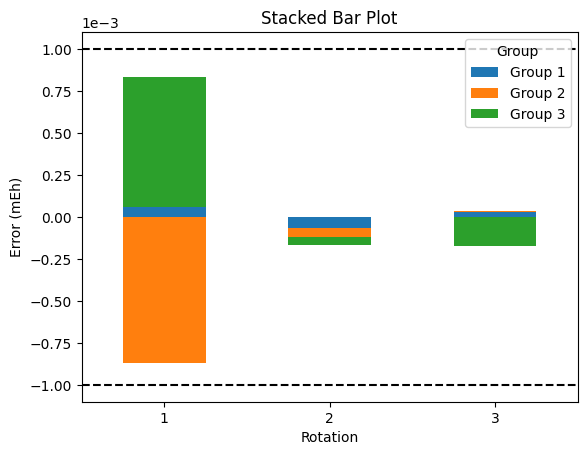

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'Rotation': ['1', '1', '1', '2', '2', '2', '3', '3', '3'],
    'Group': ['Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3'],
    'Value': [6.129789e-05, -8.724818e-04, 7.715878e-04, -6.788524e-05, -5.431277e-05, -4.738371e-05, 2.963136e-05, 8.467038e-06, -1.749603e-04]
}
df_extended = pd.DataFrame(data)
pivot_df = df_extended.pivot(index='Rotation', columns='Group', values='Value').fillna(0)
pivot_df.plot(kind='bar', stacked=True)#, figsize=(10, 6))
plt.title('Stacked Bar Plot')
# plt.xlabel('Rotation')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Error (mEh)')

plt.axhline(y=1e-3, color='k', linestyle='--')
# plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')

plt.show()

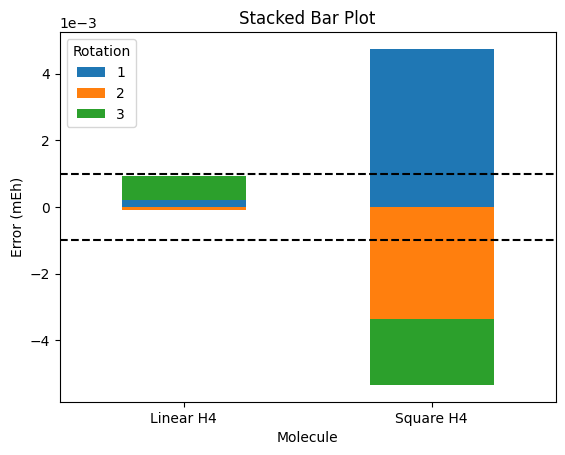

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'Molecule': ['Linear H4', 'Linear H4', 'Linear H4', 'Square H4', 'Square H4', 'Square H4'],
    'Rotation': ['1', '2', '3', '1', '2', '3'],
    'Value': [2.084931e-04, -9.384863e-05, 7.117607e-04, 4.743110e-03, -3.373012e-03, -1.965862e-03]
}
df_extended = pd.DataFrame(data)
pivot_df = df_extended.pivot(index='Molecule', columns='Rotation', values='Value').fillna(0)
pivot_df.plot(kind='bar', stacked=True)#, figsize=(10, 6))
plt.title('Stacked Bar Plot')
# plt.xlabel('Rotation')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Error (mEh)')

plt.axhline(y=1e-3, color='k', linestyle='--')
# plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=-1e-3, color='k', linestyle='--')

plt.show()